# Medical Cost Predictions

Thank you for stopping by! This is my first project from scratch with no insight or input from course instructors so any feedback would be greatly appreciated to help me continue to expand my knowledge! I would also appreciate any insight on where everyone's go-to sources are to research algorithms and python code.

## Background

The United States spends significantly more money on healthcare than any other country around the world.  Spending is expected to continue to grow with The Centers for Medicare and Medicaid Services (CMS) projecting that by 2028, costs will climb to $6.2 trillion, or about $18,000 per person, and will represent about 20 percent of GDP. With an aging population and actual costs of services expected to increase as well it will be of great value for insurance companies, healthcare companies and patients to have an idea of where their future costs may be.  

## Problem

We will be looking to answer the following question through prediction modeling: **What will a patient's future healthcare costs look like?**

## About the Data

The data we will be using for this project is an open-source data source from Kaggle regarding insurance costs.

To begin we will:

* Import our dataset
* Create our dataset into a dataframe

In [2]:
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [3]:
import numpy as np #for dealing with arrays
import pandas as pd #for dealing with dataframes
import matplotlib.pyplot as plt #for visualization with matplotlib
%matplotlib inline
import seaborn as sns #for visualization with seaborn
from scipy import stats #for descriptive statistics such as pearson coef

print('libraries imported')

libraries imported


In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning/Wrangling

First I will check for missing data values:

Here I will:

* Verify if any missing values
* Verify format of the data and reformat if necessary
* Normalize the data if necessary
* Perform binning of the data if necessary
* Turn categorical variables into quantitative variables

In [5]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

age
False    1338
Name: age, dtype: int64

sex
False    1338
Name: sex, dtype: int64

bmi
False    1338
Name: bmi, dtype: int64

children
False    1338
Name: children, dtype: int64

smoker
False    1338
Name: smoker, dtype: int64

region
False    1338
Name: region, dtype: int64

charges
False    1338
Name: charges, dtype: int64



This confirms there are no missing data values, now I will verify the types of data in the dataframe:

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The dataframe looks good - we are ready to start!

## Exploratory Data Analysis

Here I will look at:

* Implementing descriptive statistics
* Group data as necessary
* Eliminate outliers if necessary
* Look at data correlations

In [17]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Slight correlations between age and charges and bmi and charges but none of the correlations give us anything really definitive, so lets take a look at Pearson Coefficients

p-value is < 0.001: we say there is strong evidence that the correlation is significant. \
p-value is < 0.05: there is moderate evidence that the correlation is significant. \
p-value is < 0.1: there is weak evidence that the correlation is significant. \
p-value is > 0.1: there is no evidence that the correlation is significant.

In [48]:
pearson_coef, p_value = stats.pearsonr(df['age'], df['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.29900819333064765  with a P-value of P = 4.8866933317203816e-29


In [49]:
earson_coef, p_value = stats.pearsonr(df['bmi'], df['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.29900819333064765  with a P-value of P = 2.459085535117846e-13


In [50]:
earson_coef, p_value = stats.pearsonr(df['children'], df['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.29900819333064765  with a P-value of P = 0.012852128520141125


(0.0, 66902.8557155)

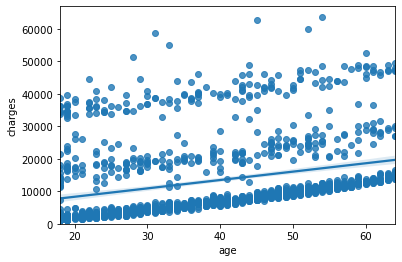

In [22]:
# Age as potential predictor variable of cost
sns.regplot(x="age", y="charges", data=df)
plt.ylim(0,)

(0.0, 66902.8557155)

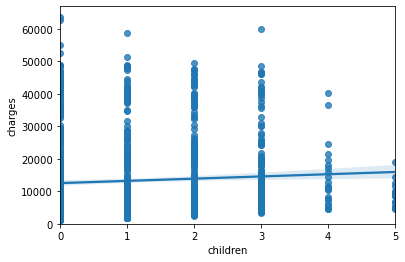

In [23]:
# Children as potential predictor variable of cost
sns.regplot(x="children", y="charges", data=df)
plt.ylim(0,)

(0.0, 66902.8557155)

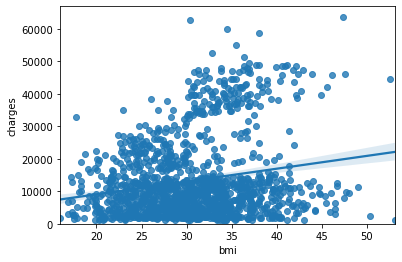

In [24]:
# BMI as potential predictor variable of cost
sns.regplot(x="bmi", y="charges", data=df)
plt.ylim(0,)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

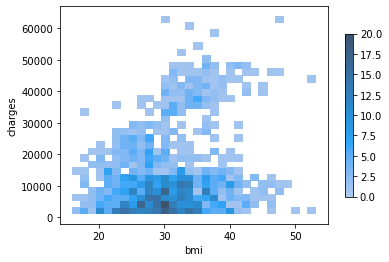

In [46]:
df1=pd.DataFrame(df, columns=["bmi","charges"])
df1
sns.histplot(
    df1, x="bmi", y="charges",
    bins=30, discrete=(False), log_scale=(False),
    cbar=True, cbar_kws=dict(shrink=.75),
)

<AxesSubplot:xlabel='children', ylabel='charges'>

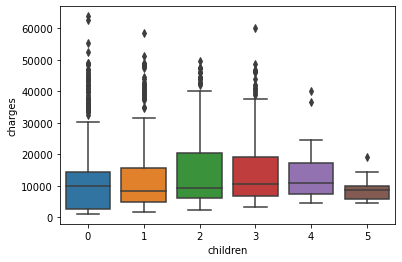

In [7]:
sns.boxplot(x="children", y="charges", data=df)

Next Let's take a look at ANOVA:

**ANOVA**: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. *A larger score means there is a larger difference between the means*.

**P-value**: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

## Model Development

I will be doing predictive modeling through a regression based machine learning algorithm

## Model Evaluation

## Results

Result & Implication of the result

## Discussion

## Conclusion